In [7]:
import os
import cv2
import pickle
import numpy as np
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Conv2D, Flatten, Dense, AveragePooling2D

In [8]:
path = './asl_dataset/'
data,label = [],[]
for root, dirs, files in os.walk(path):
    key = os.path.basename(root)
    for file in files:
        full_file_path = os.path.join(root,file)
        img = cv2.imread(full_file_path)
        img = cv2.resize(img,(128,128))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        data.append(img)
        label.append(key)

data = np.array(data)
label = np.array(label)

In [9]:
x_train, x_test0, y_train, y_test0 = train_test_split(data, label, train_size=0.8, shuffle=True)
x_test, x_val, y_test, y_val = train_test_split(x_test0, y_test0, train_size=0.5, shuffle=True)

In [10]:
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

(2012, 128, 128, 3)
(2012,)
(252, 128, 128, 3)
(252,)
(251, 128, 128, 3)
(251,)


In [11]:
# Normalization
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

In [12]:
#Encode labels from string to int
le = preprocessing.LabelEncoder()
labelEnc_train = le.fit_transform(y_train)
labelEnc_test = le.fit_transform(y_test)
labelEnc_val = le.fit_transform(y_val)

In [13]:
print(x_val.shape)
print(labelEnc_val.shape)

(252, 128, 128, 3)
(252,)


In [14]:
num_classes = 36

model = keras.Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape = (128,128,3)))
model.add(AveragePooling2D())

model.add(Conv2D(64, (5,5), activation = 'relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 average_pooling2d (AverageP  (None, 62, 62, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 64)        51264     
                                                                 
 average_pooling2d_1 (Averag  (None, 29, 29, 64)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 53824)             0         
                                                                 
 dense (Dense)               (None, 128)               6

In [15]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [16]:
# Training the Neural Network
history = model.fit(x_train, labelEnc_train, validation_data=(x_val,labelEnc_val), epochs=8, batch_size=32)

Epoch 1/8
63/63 [==============================] - 11s 162ms/step - loss: 1.1907 - acc: 0.6794 - val_loss: 0.4366 - val_acc: 0.8532
Epoch 2/8
63/63 [==============================] - 10s 161ms/step - loss: 0.1980 - acc: 0.9384 - val_loss: 0.2952 - val_acc: 0.9127
Epoch 3/8
63/63 [==============================] - 10s 162ms/step - loss: 0.0758 - acc: 0.9747 - val_loss: 0.3295 - val_acc: 0.9127
Epoch 4/8
63/63 [==============================] - 10s 160ms/step - loss: 0.0406 - acc: 0.9851 - val_loss: 0.2297 - val_acc: 0.9405
Epoch 5/8
63/63 [==============================] - 10s 161ms/step - loss: 0.0217 - acc: 0.9930 - val_loss: 0.2564 - val_acc: 0.9484
Epoch 6/8
63/63 [==============================] - 10s 158ms/step - loss: 0.0201 - acc: 0.9925 - val_loss: 0.2457 - val_acc: 0.9563
Epoch 7/8
63/63 [==============================] - 10s 160ms/step - loss: 0.0203 - acc: 0.9960 - val_loss: 0.2151 - val_acc: 0.9444
Epoch 8/8
63/63 [==============================] - 10s 161ms/step - loss: 0.

In [17]:
loss, accuracy = model.evaluate(x_test, labelEnc_test)
print('Test Accuracy =', accuracy)

8/8 [==============================] - 0s 33ms/step - loss: 0.1312 - acc: 0.9681
Test Accuracy = 0.9681274890899658


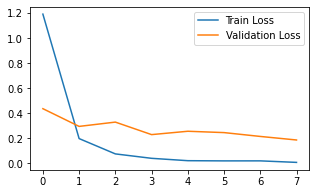

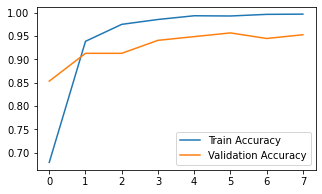

In [18]:
# Plot the loss value
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.figure(figsize=(5,3))
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.show()

In [19]:
# Classification Report
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)

print(classification_report(y_pred, labelEnc_test))

8/8 [==============================] - 0s 30ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         9
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         6
           4       0.89      1.00      0.94         8
           5       1.00      0.83      0.91         6
           6       0.80      1.00      0.89         4
           7       1.00      0.71      0.83         7
           8       0.71      1.00      0.83         5
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       1.00      